In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [2]:
np.random.seed(222)

In [3]:
iris = load_iris()

## Iris data: classes

In [4]:
print("classes", iris.target_names)

classes ['setosa' 'versicolor' 'virginica']


## Iris data: features
![features](notebook_images/iris.png)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## considering only two features since it is easy to visualize in 2D

In [6]:
X = iris.data[:, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [7]:
# X[:, 0] = X[:, 0] * 100
# X[:, 0]

In [8]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Class distribution

In [9]:
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [10]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=222)

In [11]:
print(x_train.shape, y_train.shape)

(120, 2) (120,)


In [12]:
print(x_val.shape, y_val.shape)

(30, 2) (30,)


## Sklearn - Logistic regression

In [13]:
logreg = LogisticRegression(solver='sag', 
                            multi_class='multinomial', 
                            verbose=2, 
                            penalty='none', 
                            max_iter=10000000)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(x_train, y_train)

convergence after 2057 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=2,
                   warm_start=False)

In [14]:
np.var(X[:, 0]), np.var(X[:, 1])

(0.6811222222222223, 0.1887128888888889)

In [15]:
y_preds = logreg.predict(x_val)
y_preds_train = logreg.predict(x_train)

In [16]:
confusion_matrix(y_val, y_preds)

array([[9, 1, 0],
       [0, 6, 2],
       [0, 6, 6]])

## Classification report

In [17]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.46      0.75      0.57         8
           2       0.75      0.50      0.60        12

    accuracy                           0.70        30
   macro avg       0.74      0.72      0.71        30
weighted avg       0.76      0.70      0.71        30



In [18]:
## Getting probability instead of just the class labels
logreg.predict_proba(x_val)

array([[9.62866245e-01, 3.52950213e-02, 1.83873407e-03],
       [9.99897509e-01, 9.95218297e-05, 2.96957757e-06],
       [1.73232133e-04, 4.26676475e-01, 5.73150293e-01],
       [7.57702692e-13, 7.82131851e-01, 2.17868149e-01],
       [1.10779590e-04, 7.90330092e-01, 2.09559128e-01],
       [4.70513877e-09, 5.32005123e-01, 4.67994873e-01],
       [5.74328717e-04, 9.66453915e-01, 3.29717566e-02],
       [9.88118705e-09, 4.57489576e-01, 5.42510414e-01],
       [5.71503320e-10, 5.53014809e-01, 4.46985190e-01],
       [5.08586471e-08, 7.96967803e-01, 2.03032146e-01],
       [6.57850207e-07, 4.15862582e-01, 5.84136760e-01],
       [3.59038282e-06, 7.68187928e-01, 2.31808482e-01],
       [1.80850751e-19, 6.30753377e-02, 9.36924662e-01],
       [9.99954571e-01, 2.89705937e-05, 1.64579460e-05],
       [1.24414110e-09, 2.89652371e-01, 7.10347627e-01],
       [1.00186486e-08, 2.72547353e-01, 7.27452637e-01],
       [9.97380932e-13, 1.22711473e-01, 8.77288527e-01],
       [9.99960445e-01, 3.43611

## Decision boundary

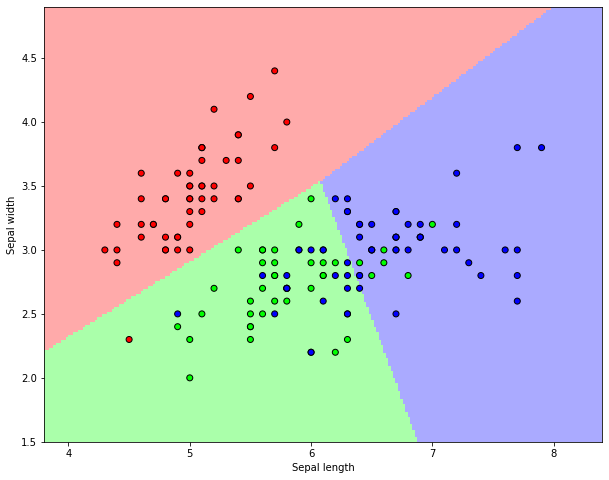

In [19]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()